In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor
from PIL import Image
import os
from torchvision.io import read_image
import torchvision.datasets as datasets

## Inspect data
* Strong/P05/Anger/* is all the same picture

## Load all data

In [3]:
sample_dataset = datasets.ImageFolder("../data/B_OriginalImg/VL/Strong/")

In [4]:
target_dataset = datasets.ImageFolder("../data/B_OriginalImg/NI/Strong/")

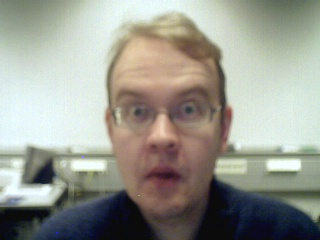

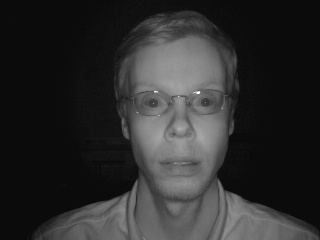

In [32]:
idx = 3300
display(sample_dataset.__getitem__(idx)[0])
display(target_dataset.__getitem__(idx)[0])

In [6]:
# dataset = ImageFolder("../data/B_OriginalImg/VL/Strong/")

In [7]:
# Create a data loader
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [8]:
def is_png(f: str):
    return len(f) > 4 and f[-5:] == ".jpeg"

def extract_info(fp: str) -> (str, str, int, str):
    info = fp.split("/")[-4:]
    
    return info[0], info[1], int(info[2][1:]), info[3]

def prepare_dict_structure(data, *args):
    args = list(args)
    if len(args) == 0:
        return
    if args[0] not in list(data.keys()):
        data[args[0]] = dict()
    prepare_dict_structure(data[args[0]], *args[1:])

class OuluCasiaDataset(Dataset):
    def __init__(self, source_img_dir, target_img_dir, transform=None, target_transform=None):
        self.source_img_dir = source_img_dir
        self.target_img_dir = target_img_dir
        self.transform = transform
        self.target_transform = target_transform
        
        self.mapped_images = []
        self.setup_mapping(source_img_dir, target_img_dir)
        

    def setup_mapping(self, source_img_dir, target_img_dir):
        m = []
        
        for dir_path, dirs, files in os.walk(source_img_dir):
#             print(dir_path)

            # if bottom directory
            if len(dirs) == 0:
                # extract info about images from path
                spect, light, person_id, emotion = extract_info(dir_path)
                
                code = light + "/" + str(person_id) + "/" + emotion
                code = dir_path[len(source_img_dir):]
                
                for f in files:
                    if is_png(f):
                        m.append(os.path.join(code, f))
                        

        
        for dir_path, dirs, files in os.walk(target_img_dir):
#             print(dir_path)

            # if bottom directory
            if len(dirs) == 0:
                # extract info about images from path
                spect, light, person_id, emotion = extract_info(dir_path)
                
                code = light + "/" + str(person_id) + "/" + emotion
                code = dir_path[len(target_img_dir):]
#                 if code in m:
#                     self.mapped_images.append([os.path.join(source_img_dir, code), os.path.join(target_img_dir, code)])
                
                for f in files:
                    if is_png(f) and os.path.join(code, f) in m:
                        self.mapped_images.append([os.path.join(source_img_dir, code, f), os.path.join(target_img_dir, code, f)])
        
    def __len__(self):
        return len(self.mapped_images)

    def __getitem__(self, idx):
        print(self.mapped_images[idx][0])
        print(self.mapped_images[idx][1])
        
        image = Image.open(self.mapped_images[idx][0])#cv2.imread(self.mapped_images[idx][0])#np.load(self.mapped_images[idx][0], allow_pickle=True)
        target_image =  Image.open(self.mapped_images[idx][1]) #cv2.imread(self.mapped_images[idx][1]) # read_image(self.mapped_images[idx][1], allow_pickle=True)
        
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            target_image = self.target_transform(target_image)
        return image, target_image

In [26]:
dataset1 = OuluCasiaDataset("../data/B_OriginalImg/NI/", "../data/B_OriginalImg/VL/")

../data/B_OriginalImg/NI/Strong/P009/Surprise/010.jpeg
../data/B_OriginalImg/VL/Strong/P009/Surprise/010.jpeg


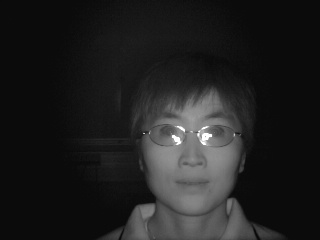

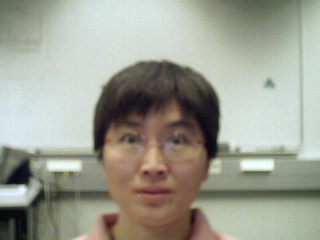

In [38]:
idx = 246
sample = dataset1.__getitem__(idx)

display(sample[0])
display(sample[1])

In [ ]:
def is_png(f: str):
    return len(f) > 4 and f[-5:] == ".jpeg"

def extract_info(fp: str) -> (str, str, int, str):
    info = fp.split("/")[-4:]
    
    return info[0], info[1], int(info[2][1:]), info[3]

def prepare_dict_structure(data, *args):
    args = list(args)
    if len(args) == 0:
        return
    if args[0] not in list(data.keys()):
        data[args[0]] = dict()
    prepare_dict_structure(data[args[0]], *args[1:])

In [ ]:
data = {}

In [ ]:
fp_dir = "../data/B_OriginalImg"
for dir_path, dirs, files in os.walk(fp_dir):
    print(dir_path)
    
    # if bottom directory
    if len(dirs) == 0:
        # extract info about images from path
        spect, light, person_id, emotion = extract_info(dir_path)
    
        images = []
        ids = []
        for f in files:
            if is_png(f):
                images.append(cv2.imread(dir_path+"/"+f))
                ids.append(int(f[-8:-5]))
        
        prepare_dict_structure(data, spect, light, person_id, emotion)
        data[spect][light][person_id][emotion]["images"] = images
        data[spect][light][person_id][emotion]["ids"] = ids

In [ ]:
sample = data["VL"]["Strong"][77]["Happiness"]["images"][0]
print(sample.shape)
cv2.imshow("wada", sample)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
sample = data["NI"]["Strong"][77]["Happiness"]["images"][0]
print(sample.shape)
cv2.imshow("wada", sample)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Split data

In [ ]:
X = data["NI"]["Strong"][...][...]["images"]

In [ ]:
# X = ...
# y = ...
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Create dataloader

## CenterFace

In [47]:
!pip3 install numpy opencv-python onnxruntime skl2onnx

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 3.7 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 1.5 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 8.9 MB/s eta 0:00:000m eta 0:00:010:01:01
  Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.22.1
    Uninstalling protobuf-4.22.1:
      Successfully uninstalled protobuf-4.22.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompa

In [48]:
import onnx
onnx_model = onnx.load("centerface.onnx")
onnx.checker.check_model(onnx_model)

/home/tomas/.local/lib/python3.10/site-packages/onnx/__init__.py:108: RuntimeWarning: Unexpected end-group tag: Not all data was converted
  decoded = cast(Optional[int], proto.ParseFromString(s))


DecodeError: Protobuf decoding consumed too few bytes: 13 out of 139181

In [45]:
import onnxruntime as ort

model_path = "centerface.onnx"
session = ort.InferenceSession(model_path)

InvalidProtobuf: [ONNXRuntimeError] : 7 : INVALID_PROTOBUF : Load model from centerface.onnx failed:Protobuf parsing failed.